# Data Extraction

In [6]:
import pandas as pd
import numpy as np

myvars = {}
with open("nihatoom-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()


import MySQLdb
conn = MySQLdb.connect(host = "localhost",user=myvars['DB username'], passwd=myvars['DB password'], db='I501Fa21grp05_db', local_infile = 1)
cursor = conn.cursor()

In [7]:
# Pull data from database where the age of the respondant is 25 years old or greater.

df = pd.read_sql('select CATAG6, DEPNDALC,DEPNDMRJ,DEPNDCOC,DEPNDHER,DEPNDPYHAL,DEPNDPYINH,DEPNDPYMTH,DEPNDPYPNR,DEPNDPYSTM,DEPNDPYSED,DEPNDPYPSY,DEPNDPYILL,ABUSEALC,ABUSEMRJ,ABUSECOC,ABUSEHER,ABUSEPYHAL,ABUSEPYINH,ABUSEPYMTH,ABUSEPYPNR,ABUSEPYTRQ,ABUSEPYSTM,ABUSEPYSED,ABUSEPYPSY,ABUSEPYILL,ABPYILLALC,TXEVRRCVD,DPPYILLALC,HRTCONDEV,DIABETEVR,COPDEVER,CIRROSEVR,HEPBCEVER,KIDNYDSEV,ASTHMAEVR,CANCEREVR,HIGHBPEVR,INHOSPYR,NMVSOPT2,BMI2,ADDPREV, HEALTH2 from NSDUH_4 where CATAG6 > 2;',conn)

In [8]:
df.columns

Index(['CATAG6', 'DEPNDALC', 'DEPNDMRJ', 'DEPNDCOC', 'DEPNDHER', 'DEPNDPYHAL',
       'DEPNDPYINH', 'DEPNDPYMTH', 'DEPNDPYPNR', 'DEPNDPYSTM', 'DEPNDPYSED',
       'DEPNDPYPSY', 'DEPNDPYILL', 'ABUSEALC', 'ABUSEMRJ', 'ABUSECOC',
       'ABUSEHER', 'ABUSEPYHAL', 'ABUSEPYINH', 'ABUSEPYMTH', 'ABUSEPYPNR',
       'ABUSEPYTRQ', 'ABUSEPYSTM', 'ABUSEPYSED', 'ABUSEPYPSY', 'ABUSEPYILL',
       'ABPYILLALC', 'TXEVRRCVD', 'DPPYILLALC', 'HRTCONDEV', 'DIABETEVR',
       'COPDEVER', 'CIRROSEVR', 'HEPBCEVER', 'KIDNYDSEV', 'ASTHMAEVR',
       'CANCEREVR', 'HIGHBPEVR', 'INHOSPYR', 'NMVSOPT2', 'BMI2', 'ADDPREV',
       'HEALTH2'],
      dtype='object')

In [9]:
len(df)

144589

In [10]:
def recodeColumn(dframe, column, bad_val, recode_val):
    dframe[column].replace(bad_val,recode_val,inplace=True)

In [11]:
for i in df.columns:
    print(i,df[i].unique())

CATAG6 [4 3 5 6]
DEPNDALC [0 1]
DEPNDMRJ [0 1]
DEPNDCOC [0 1]
DEPNDHER [0 1]
DEPNDPYHAL [0 1]
DEPNDPYINH [0 1]
DEPNDPYMTH [0 1]
DEPNDPYPNR [0 1]
DEPNDPYSTM [0 1]
DEPNDPYSED [0 1]
DEPNDPYPSY [0 1]
DEPNDPYILL [0 1]
ABUSEALC [0 1]
ABUSEMRJ [0 1]
ABUSECOC [0 1]
ABUSEHER [0 1]
ABUSEPYHAL [1 0]
ABUSEPYINH [0 1]
ABUSEPYMTH [0 1]
ABUSEPYPNR [0 1]
ABUSEPYTRQ [0 1]
ABUSEPYSTM [0 1]
ABUSEPYSED [0 1]
ABUSEPYPSY [0 1]
ABUSEPYILL [1 0]
ABPYILLALC [1 0]
TXEVRRCVD [ 2 91  1 94 98 97 85]
DPPYILLALC [0 1]
HRTCONDEV [99  2  1 97 94 85 98]
DIABETEVR [99  1  2 97 94 85 98]
COPDEVER [99  2  1 97 94 85 98]
CIRROSEVR [99  2 97  1 94 85 98]
HEPBCEVER [99  2 97  1 94 85 98]
KIDNYDSEV [99  2 97  1 94 85 98]
ASTHMAEVR [99  2  1 97 94 85 98]
CANCEREVR [99  2 97  1 94 85 98]
HIGHBPEVR [99  1  2 97 94 85 98]
INHOSPYR [ 2  1 97 94 98 85]
NMVSOPT2 [  0  16  15   2   6   1   4   3 994   5  19   8  12   9  10 997   7  18
  17  11  14  13 998 985]
BMI2 [26 35 24 27  0 28 34 31 33 29 32 39 40 36 38 47 45 54 22 25 23 20 42

In [12]:
recodeColumn(df, 'TXEVRRCVD', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'HRTCONDEV', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'DIABETEVR', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'CIRROSEVR', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'HEPBCEVER', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'KIDNYDSEV', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'COPDEVER', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'ASTHMAEVR', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'CANCEREVR', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'HIGHBPEVR', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'INHOSPYR', [91,94,98,97,85,0,99,2], 0)
recodeColumn(df, 'NMVSOPT2', [17,18,19], 17)
recodeColumn(df, 'NMVSOPT2', [994,997,998,985], 0)
recodeColumn(df, 'BMI2', [31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70], 1)
recodeColumn(df, 'BMI2', [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30], 0)
recodeColumn(df, 'ADDPREV', [2,97,94,98,85], 0)

In [13]:
#CATAG6-RC-AGE CATEGORY RECODE (6 LEVELS)
#1 = 12-17 Years Old.
#2 = 18-25 Years Old
#3 = 26-34 Years Old
#4 = 35-49 Years Old
#5 = 50-64 Years Old
#6 = 65 or Older

#HRTCONDEV1 - EVER TOLD HAD HEART CONDITION
#DIABETEVR1- EVER TOLD HAD DIABETES/SUGAR DIABETES
#COPDEVER1 - EVER TOLD HAD CHRONIC BRONCHITIS OR COPD
#CIRROSEVR1- EVER TOLD HAD CIRRHOSIS OF THE LIVER
#HEPBCEVER1 - EVER TOLD HAD HEPATITIS B OR C
#KIDNYDSEV1 -EVER TOLD HAD KIDNEY DISEASE
#ASTHMAEVR1 - EVER TOLD HAD ASTHMA
#HIVAIDSEV1- EVER TOLD HAD HIV OR AIDS
#CANCEREVR1- EVER TOLD HAD CANCER
#HIGHBPEVREVER-TOLD HAD HIGH BLOOD PRESSURE
#INHOSPYR-STAYED OVERNIGHT AS INPNT IN HOSP PAST 12 MOS
#NMVSOPT2-OUTPATIENT VISITS PAST 12 MOS - RECODE
#BMI2-RC-BODY MASS INDEX (BMI)
#ADDPREV-SEVERAL DAYS OR LNGR WHEN FELT SAD/EMPTY/DPRSD


In [14]:
#df.assign(normalized=df.bought.div(df.user.map(df.groupby('user').bought.sum())))

In [15]:
#data_ex = df[['CATAG6', 'ABUSEPYPSY', 'ABUSEPYILL','ABPYILLALC', 'TXEVRRCVD', 'DPPYILLALC', 'HRTCONDEV', 'DIABETEVR','COPDEVER', 'CIRROSEVR', 'HEPBCEVER', 'KIDNYDSEV', 'ASTHMAEVR','CANCEREVR', 'HIGHBPEVR', 'INHOSPYR', 'NMVSOPT2', 'BMI2']]
data_ex = df
cols = data_ex.columns[1:]
data_ex['obs'] = 1
data_agg = data_ex.groupby(['CATAG6']).sum().reset_index()

for i in cols:
    data_agg[i] = data_agg[i]/data_agg['obs']

In [16]:
data_agg

,CATAG6,DEPNDALC,DEPNDMRJ,DEPNDCOC,DEPNDHER,DEPNDPYHAL,DEPNDPYINH,DEPNDPYMTH,DEPNDPYPNR,DEPNDPYSTM,...,KIDNYDSEV,ASTHMAEVR,CANCEREVR,HIGHBPEVR,INHOSPYR,NMVSOPT2,BMI2,ADDPREV,HEALTH2,obs
0,3,0.047687,0.015426,0.004226,0.005112,0.000591,0.000114,0.005702,0.009315,0.002704,...,0.006634,0.112323,0.012041,0.058274,0.087945,2.860437,0.287804,0.323837,2.196974,44016
1,4,0.037690,0.006629,0.002811,0.002634,0.000424,0.000141,0.004614,0.006453,0.001344,...,0.011190,0.097797,0.029417,0.137008,0.075947,2.986476,0.345561,0.309232,2.330163,56566
2,5,0.026256,0.002816,0.002856,0.001428,0.000159,0.000119,0.002340,0.004878,0.000833,...,0.021418,0.085234,0.076944,0.270178,0.103835,3.626740,0.348947,0.284893,2.508389,25213
3,6,0.008460,0.000426,0.000106,0.000053,0.000053,0.000053,0.000160,0.001383,0.000106,...,0.049111,0.076780,0.167447,0.398531,0.170107,4.493509,0.279770,0.218421,2.596414,18794


In [17]:
from sklearn import feature_selection
chi2, p = feature_selection.chi2(df[[ 'DEPNDALC', 'DEPNDMRJ', 'DEPNDCOC', 'DEPNDHER', 'DEPNDPYHAL',
       'DEPNDPYINH', 'DEPNDPYMTH', 'DEPNDPYPNR', 'DEPNDPYSTM', 'DEPNDPYSED',
       'DEPNDPYPSY', 'DEPNDPYILL', 'ABUSEALC', 'ABUSEMRJ', 'ABUSECOC',
       'ABUSEHER', 'ABUSEPYHAL', 'ABUSEPYINH', 'ABUSEPYMTH', 'ABUSEPYPNR',
       'ABUSEPYTRQ', 'ABUSEPYSTM', 'ABUSEPYSED', 'ABUSEPYPSY', 'ABUSEPYILL',
       'ABPYILLALC', 'TXEVRRCVD', 'DPPYILLALC', 'HRTCONDEV', 'DIABETEVR',
       'COPDEVER', 'CIRROSEVR', 'HEPBCEVER', 'KIDNYDSEV', 'ASTHMAEVR',
       'CANCEREVR', 'HIGHBPEVR', 'INHOSPYR', 'NMVSOPT2', 'BMI2', 'ADDPREV',
       'HEALTH2']],df['CATAG6'])

In [18]:
print(chi2,p)

[6.48515459e+02 5.46908709e+02 7.74810869e+01 1.49795926e+02
 1.39522561e+01 9.42339603e-01 1.24797543e+02 1.41685978e+02
 7.48514480e+01 8.00005113e+00 2.11806523e+02 8.19399288e+02
 4.08355708e+02 1.06953069e+02 4.59467610e+01 8.71396499e+00
 5.04016366e+01 9.57653274e+00 1.78833354e+01 2.56294556e+01
 3.22641879e+01 1.96883676e+01 4.62259318e+00 5.09161148e+01
 1.60693487e+02 4.36320981e+02 4.30639236e+02 1.23181776e+03
 1.08672542e+04 6.17024948e+03 2.77629746e+03 2.46616870e+02
 3.84644774e+02 1.60309122e+03 2.21305794e+02 7.24660390e+03
 1.08400492e+04 1.34738809e+03 1.32826131e+04 4.19122907e+02
 5.37075621e+02 1.19840109e+03] [3.05650919e-140 3.25066439e-118 1.06471692e-016 2.91600814e-032
 2.97086603e-003 8.15200105e-001 7.14562366e-027 1.63650589e-030
 3.89892427e-016 4.60106490e-002 1.18506914e-045 2.68486449e-177
 3.42928551e-088 4.96567162e-023 5.82125185e-010 3.33458283e-002
 6.56084545e-011 2.25309652e-002 4.64902184e-004 1.14023223e-005
 4.60368096e-007 1.96947732e-004 

# Data Cleansing

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [20]:
def run_correl(df):
    correl = pd.DataFrame(columns = df.columns)
    val = []
    i=0
    for c1 in df.columns:
        for c2 in df.columns:
            x = df[c1]
            y = df[c2]

            val.append(cramers_v(x,y))

        correl.loc[i] = val
        i+=1
        val = []
    
    return correl

In [42]:
df = df[[ 'ABUSEALC', 'ABUSEMRJ', 'ABUSECOC',
       'ABUSEHER','ABUSEPYILL',
       'ABPYILLALC', 'TXEVRRCVD', 'DPPYILLALC', 'HRTCONDEV', 'DIABETEVR',
       'COPDEVER', 'CIRROSEVR', 'HEPBCEVER', 'KIDNYDSEV', 'ASTHMAEVR',
       'CANCEREVR', 'HIGHBPEVR', 'INHOSPYR', 'NMVSOPT2', 'BMI2', 'ADDPREV',
       'HEALTH2','CATAG6']]

df1 = df[df['CATAG6']==5].drop(columns = ['CATAG6'])
#df2 = df[df['CATAG6']==2].drop(columns = ['CATAG6','obs'])
#df3 = df[df['CATAG6']==3].drop(columns = ['CATAG6','obs'])
#df4 = df[df['CATAG6']==4].drop(columns = ['CATAG6','obs'])
#df5 = df[df['CATAG6']==5].drop(columns = ['CATAG6','obs'])
#df6 = df[df['CATAG6']==6].drop(columns = ['CATAG6','obs'])

g1 = run_correl(df1)
#g4 = run_correl(df4)  
#g5 = run_correl(df5)  
#g6 = run_correl(df6)  

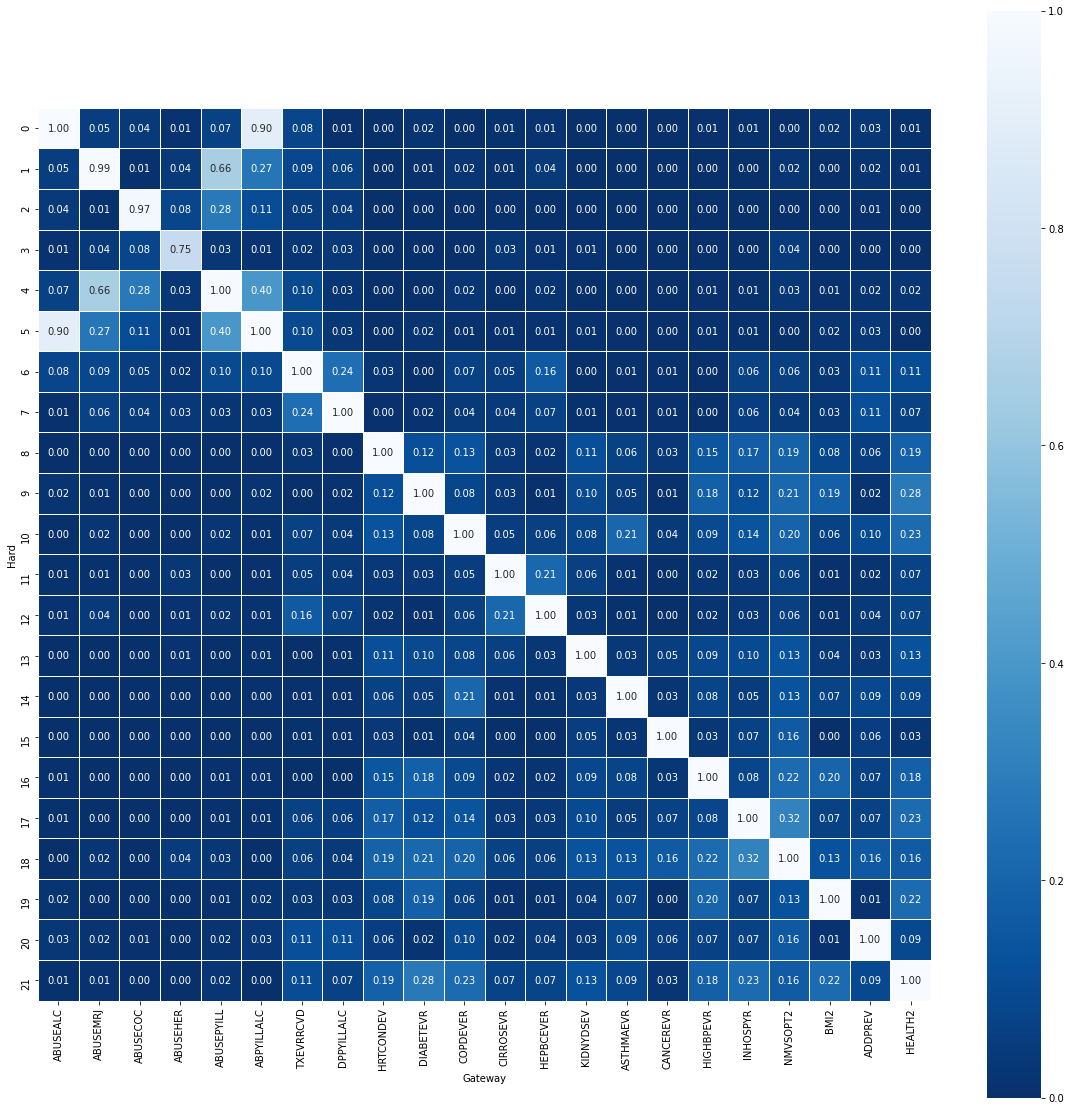

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
plt.figure(figsize=(20,20))
sns.heatmap(g1, annot=True, fmt=".2f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Hard');
plt.xlabel('Gateway');

There are no instances where drug abuse according to the dataset shows up as correlated with various health issues here.  My conclusion from this is that since the data asks the question "Have you abused or depended on X drug in teh past year" it doesn't cover long-term drug abuse which is what would lead to these conditions in the first place.  Also, the number of cases of most of these ailments is relatively low among the popuations.

<ipython-input-23-3d74850cc380>:12: UserWarning: Legend does not support '0' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles = ["0","1"],labels = ["no difficulty in thinking", "diffculty in thinking"])
<ipython-input-23-3d74850cc380>:12: UserWarning: Legend does not support '1' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles = ["0","1"],labels = ["no difficulty in thinking", "diffculty in thinking"])


<AxesSubplot:xlabel='NMVSOPT2', ylabel='count'>

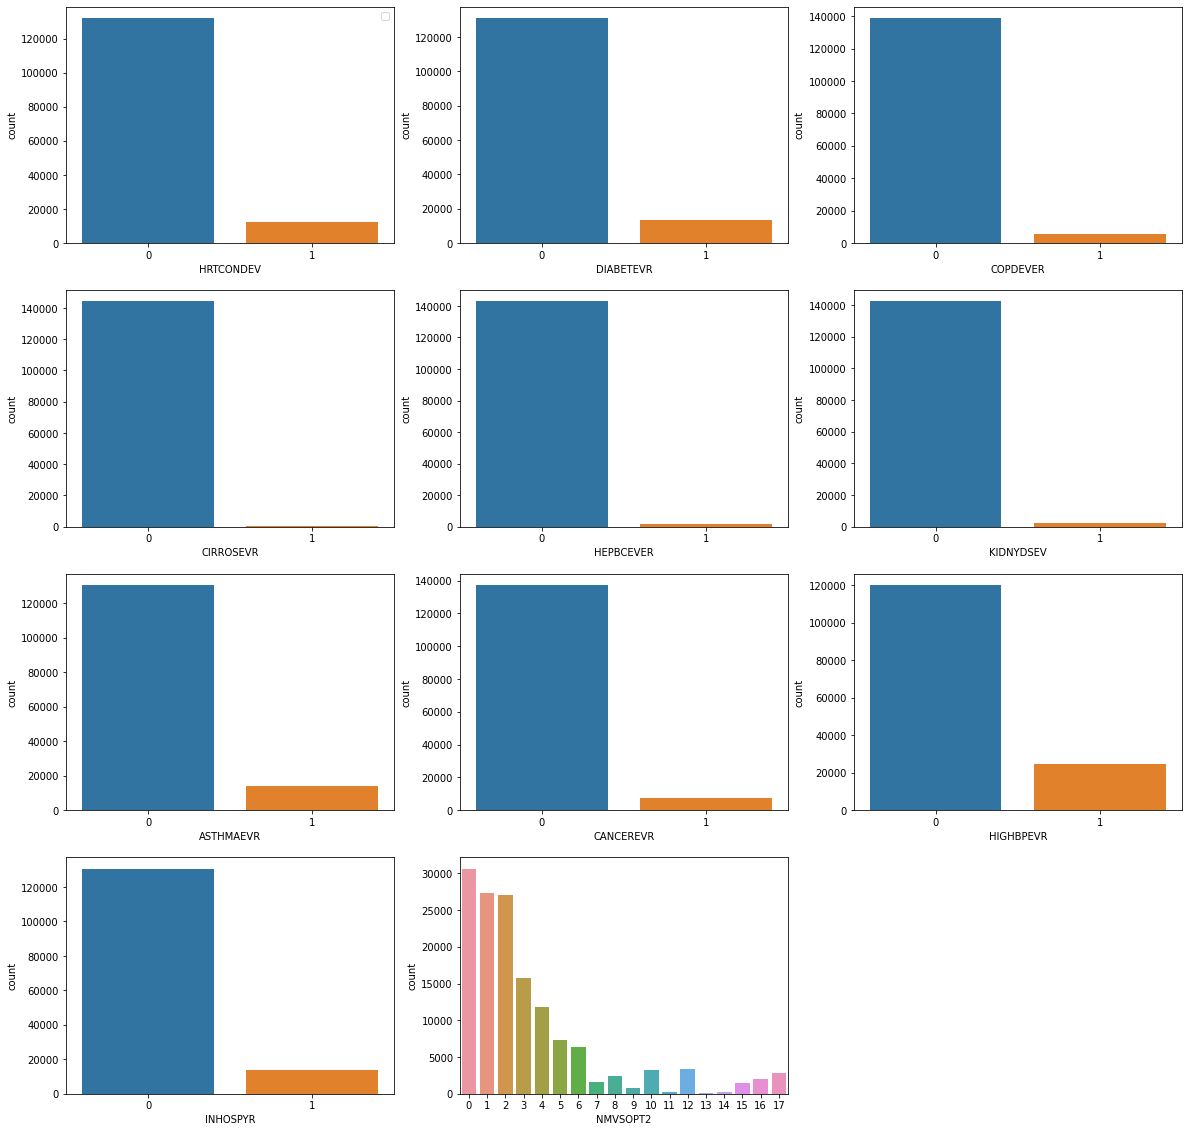

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (20,20))

ax1 = fig.add_subplot(4,3,1)
sns.countplot(data = df, x = 'HRTCONDEV', ax=ax1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax2 = fig.add_subplot(4,3,2)
sns.countplot(data = df, x = 'DIABETEVR', ax=ax2)

ax3 = fig.add_subplot(4,3,3)
sns.countplot(data = df, x = 'COPDEVER', ax=ax3)

ax4 = fig.add_subplot(4,3,4)
sns.countplot(data = df, x = 'CIRROSEVR', ax=ax4)


ax5 = fig.add_subplot(4,3,5)
sns.countplot(data = df, x = 'HEPBCEVER', ax=ax5)
plt.legend()


ax6 = fig.add_subplot(4,3,6)
sns.countplot(data = df, x = 'KIDNYDSEV', ax=ax6)
#sns.violinplot(data = ds_cat, x = 'LotConfig', y = 'SalePrice', ax=ax6)
#sns.swarmplot(data = ds_cat, x = 'LotConfig', y='SalePrice', colo

ax7 = fig.add_subplot(4,3,7)
sns.countplot(data = df, x = 'ASTHMAEVR', ax=ax7)

#sns.violinplot(data = ds_cat, x = 'LotShape', y = 'SalePrice', ax=ax5)
#sns.swarmplot(data = ds_cat, x = 'LotShape', y='SalePrice', color = 'k', alpha = 0.4, ax=ax5  )

ax8 = fig.add_subplot(4,3,8)
sns.countplot(data = df, x = 'CANCEREVR', ax=ax8)
#sns.violinplot(data = ds_cat, x = 'LotConfig', y = 'SalePrice', ax=ax6)
#sns.swarmplot(data = ds_cat, x = 'LotConfig', y='SalePrice', colo

ax9 = fig.add_subplot(4,3,9)
sns.countplot(data = df, x = 'HIGHBPEVR', ax=ax9)

#hard drugs

ax10 = fig.add_subplot(4,3,10)
sns.countplot(data = df, x = 'INHOSPYR', ax=ax10)

ax11 = fig.add_subplot(4,3,11)
sns.countplot(data = df, x = 'NMVSOPT2', ax=ax11)


In [26]:
df["CATAG6"].unique()
#3 = 26-34 Years Old...................................................................................................... 94164 9.92
#4 = 35-49 Years Old...................................................................................................... 127043 13.38
#5 = 50-64 Years Old...................................................................................................... 57977 6.11
#6 = 65 or Older .

array([4, 3, 5, 6])

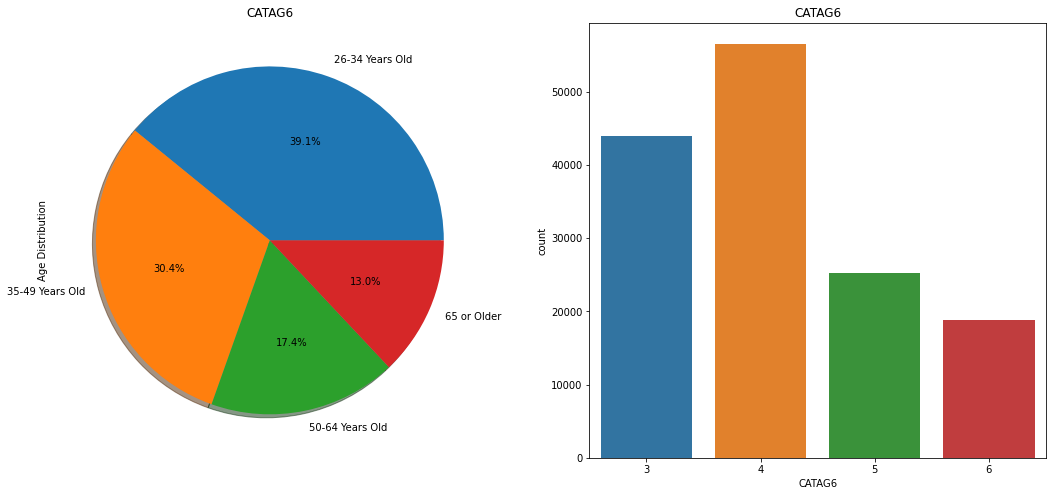

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
f,ax=plt.subplots(1,2,figsize=(18,8))
ages=("26-34 Years Old", "35-49 Years Old", "50-64 Years Old", "65 or Older")
df['CATAG6'].value_counts().plot.pie(labels= ages,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('CATAG6')
ax[0].set_ylabel('Age Distribution')
sns.countplot('CATAG6', data=df,ax=ax[1])
ax[1].set_title('CATAG6')
plt.show()

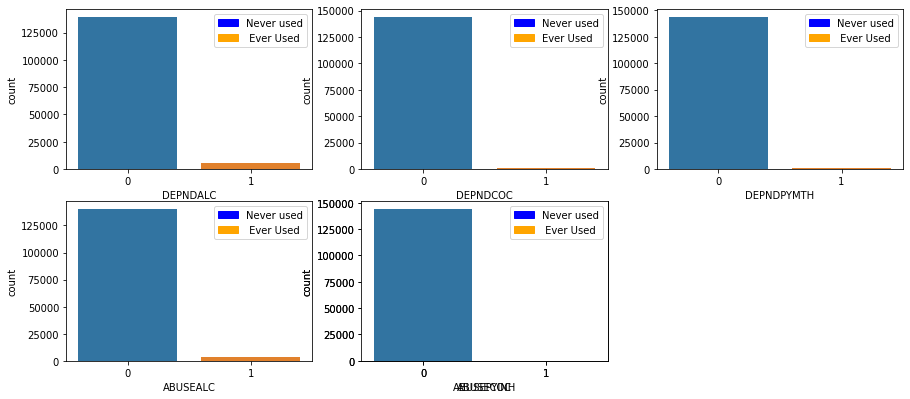

In [39]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(3,3,1)
sns.countplot(data = df, x = 'DEPNDALC', ax=ax1)
colors = { 'Never used':'blue',' Ever Used': 'orange' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax2 = fig.add_subplot(3,3,2)
sns.countplot(data = df, x = 'DEPNDCOC', ax=ax2)
colors = { 'Never used':'blue','Ever Used': 'orange' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax3 = fig.add_subplot(3,3,3)
sns.countplot(data = df, x = 'DEPNDPYMTH', ax=ax3)
colors = { 'Never used':'blue',' Ever Used': 'orange' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax4 = fig.add_subplot(3,3,4)
sns.countplot(data = df, x = 'ABUSEALC', ax=ax4)
colors = { 'Never used':'blue',' Ever Used': 'orange' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax5 = fig.add_subplot(3,3,5)
sns.countplot(data = df, x = 'ABUSECOC', ax=ax5)
colors = { 'Never used':'blue',' Ever Used': 'orange' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax6 = fig.add_subplot(3,3,5)
sns.countplot(data = df, x = 'ABUSEPYINH', ax=ax6)
colors = { 'Never used':'blue',' Ever Used': 'orange' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
